In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

In [4]:
# Load the Bank Marketing Campaign (BMC) data

BMCdata = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\bank-additional-full-V1.0.csv", header=0)
BMCdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Display the dataset information

BMCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Display unique values counts for each variable

BMCdata.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
Deposit              2
dtype: int64

In [7]:
# Replace target variable 'Deposit', 'Yes' to 1 and 'No' to 0 and # convert the 'y' to integer value.

BMCdata['Deposit'] = BMCdata['Deposit'].str.replace('yes', '1')
BMCdata['Deposit'] = BMCdata['Deposit'].str.replace('no', '0')
BMCdata['Deposit'] = BMCdata['Deposit'].astype(int)

In [8]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (>9: 1, then the dataset is imbalance dataset)

BMCdata_count = BMCdata.Deposit.value_counts()
print('Class 0:', BMCdata_count[0])
print('Class 1:', BMCdata_count[1])
print('Proportion:', round(BMCdata_count[0] / BMCdata_count[1], 2), ': 1')
print('Total CC Trans:', len(BMCdata))

Class 0: 36548
Class 1: 4640
Proportion: 7.88 : 1
Total CC Trans: 41188


In [9]:
# Displaying Duplicate values with in dataset

BMCdata_dup = BMCdata[BMCdata.duplicated(keep='last')]
BMCdata_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


In [10]:
# Remove the identified duplicate records 

BMCdata = BMCdata.drop_duplicates()
BMCdata.shape

(41176, 21)

In [11]:
# Re-setting the row index

BMCdata = BMCdata.reset_index(drop=True)

In [12]:
# Display the data by variables wise

for i in BMCdata.columns:
    print(BMCdata[i].value_counts())

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
no         33938
yes   

In [13]:
# Display 'Housing' categorical variable 

BMCdata['housing'].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [14]:
# Replace 'housing' variable and convert the 'housing' to integer value.

BMCdata['housing'] = BMCdata['housing'].str.replace('yes', '1')
BMCdata['housing'] = BMCdata['housing'].str.replace('no', '0')
BMCdata['housing'] = BMCdata['housing'].str.replace('unk0wn', '0')
BMCdata['housing'] = BMCdata['housing'].astype(int)

In [15]:
BMCdata['housing'].value_counts()

1    21571
0    19605
Name: housing, dtype: int64

In [16]:
# Display 'loan' categorical variable 

BMCdata['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [17]:
# Replace 'loan' variable, and convert the 'loan' to integer value.

BMCdata['loan'] = BMCdata['loan'].str.replace('yes', '1')
BMCdata['loan'] = BMCdata['loan'].str.replace('no', '0')
BMCdata['loan'] = BMCdata['loan'].str.replace('unk0wn', '0')
BMCdata['loan'] = BMCdata['loan'].astype(int)

In [18]:
# Display 'job' categorical variable 

BMCdata['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [19]:
# Replace 'job' variable, and convert the 'loan' to integer value.

BMCdata['job'] = BMCdata['job'].str.replace('admin.', '3')
BMCdata['job'] = BMCdata['job'].str.replace('blue-collar', '4')
BMCdata['job'] = BMCdata['job'].str.replace('technician', '3')
BMCdata['job'] = BMCdata['job'].str.replace('services', '2')
BMCdata['job'] = BMCdata['job'].str.replace('management', '4')
BMCdata['job'] = BMCdata['job'].str.replace('retired', '3')
BMCdata['job'] = BMCdata['job'].str.replace('entrepreneur', '5')
BMCdata['job'] = BMCdata['job'].str.replace('self-employed', '2')
BMCdata['job'] = BMCdata['job'].str.replace('housemaid', '1')
BMCdata['job'] = BMCdata['job'].str.replace('unemployed', '0')
BMCdata['job'] = BMCdata['job'].str.replace('student', '0')
BMCdata['job'] = BMCdata['job'].str.replace('unknown', '0')
BMCdata['job'] = BMCdata['job'].astype(int)

In [20]:
# Display 'education' categorical variable 

BMCdata['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [21]:
# Replace the variable 'education', convert the 'education' to integer value.

BMCdata['education'] = BMCdata['education'].str.replace('illiterate', '1')
BMCdata['education'] = BMCdata['education'].str.replace('unknown', '1')
BMCdata['education'] = BMCdata['education'].str.replace('basic.4y', '2')
BMCdata['education'] = BMCdata['education'].str.replace('basic.6y', '2')
BMCdata['education'] = BMCdata['education'].str.replace('basic.9y', '2')
BMCdata['education'] = BMCdata['education'].str.replace('high.school', '3')
BMCdata['education'] = BMCdata['education'].str.replace('professional.course', '4')
BMCdata['education'] = BMCdata['education'].str.replace('university.degree', '5')
BMCdata['education'] = BMCdata['education'].astype(int)

In [22]:
# Display 'marital' categorical variable 

BMCdata['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [23]:
# Replace variable 'marital', and convert the 'marital' to integer value.

BMCdata['marital'] = BMCdata['marital'].str.replace('single', '1')
BMCdata['marital'] = BMCdata['marital'].str.replace('married', '2')
BMCdata['marital'] = BMCdata['marital'].str.replace('divorced', '3')
BMCdata['marital'] = BMCdata['marital'].str.replace('unknown', '1')
BMCdata['marital'] = BMCdata['marital'].astype(int)

In [24]:
# Display 'default' categorical variable 
BMCdata['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [25]:
# Replace variable 'default', and convert the 'default' to integer value.

BMCdata['default'] = BMCdata['default'].str.replace('yes', '1')
BMCdata['default'] = BMCdata['default'].str.replace('no', '0')
BMCdata['default'] = BMCdata['default'].str.replace('unk0wn', '0')
BMCdata['default'] = BMCdata['default'].astype(int)

In [26]:
# Delete 'default' bcoz it may not infulence the target

del BMCdata['default']

In [27]:
# Display 'contact' categorical variable 

BMCdata['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [28]:
# Replace variable 'contact', and convert the 'contact' to integer value.

BMCdata['contact'] = BMCdata['contact'].str.replace('telephone', '1')
BMCdata['contact'] = BMCdata['contact'].str.replace('cellular', '2')
BMCdata['contact'] = BMCdata['contact'].astype(int)

In [29]:
# Display 'day_of_week' categorical variable 

BMCdata['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [30]:
# Replace variable 'day_of_week', and convert the 'day_of_week' to integer value.

BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('mon', '1')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('tue', '2')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('wed', '3')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('thu', '4')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('fri', '5')
BMCdata['day_of_week'] = BMCdata['day_of_week'].astype(int)

In [31]:
# Display 'month' categorical variable 

BMCdata['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [32]:
# Replace variable 'month', and convert the 'month' to integer value.

BMCdata['month'] = BMCdata['month'].str.replace('mar', '3')
BMCdata['month'] = BMCdata['month'].str.replace('apr', '4')
BMCdata['month'] = BMCdata['month'].str.replace('may', '5')
BMCdata['month'] = BMCdata['month'].str.replace('jun', '6')
BMCdata['month'] = BMCdata['month'].str.replace('jul', '7')
BMCdata['month'] = BMCdata['month'].str.replace('aug', '8')
BMCdata['month'] = BMCdata['month'].str.replace('sep', '9')
BMCdata['month'] = BMCdata['month'].str.replace('oct', '10')
BMCdata['month'] = BMCdata['month'].str.replace('nov', '11')
BMCdata['month'] = BMCdata['month'].str.replace('dec', '12')
BMCdata['month'] = BMCdata['month'].astype(int)

In [33]:
# Display 'poutcome' categorical variable 

BMCdata['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [34]:
# Replace variable 'poutcome', and convert the 'poutcome' to integer value.

BMCdata['poutcome'] = BMCdata['poutcome'].str.replace('nonexistent', '0')
BMCdata['poutcome'] = BMCdata['poutcome'].str.replace('failure', '1')
BMCdata['poutcome'] = BMCdata['poutcome'].str.replace('success', '2')
BMCdata['poutcome'] = BMCdata['poutcome'].astype(int)

In [35]:
# Display the dataset information after converting the variables

BMCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int32  
 3   education       41176 non-null  int32  
 4   housing         41176 non-null  int32  
 5   loan            41176 non-null  int32  
 6   contact         41176 non-null  int32  
 7   month           41176 non-null  int32  
 8   day_of_week     41176 non-null  int32  
 9   duration        41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  int32  
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

In [36]:
# Delete the unneccasry variables

del BMCdata['emp.var.rate']
del BMCdata['cons.price.idx']
del BMCdata['cons.conf.idx']
del BMCdata['euribor3m']
del BMCdata['nr.employed']

In [37]:
# Identify the dependent and Target variables

IndepVar = []
for col in BMCdata.columns:
    if col != 'Deposit':
        IndepVar.append(col)

TargetVar = 'Deposit'

x = BMCdata[IndepVar]
y = BMCdata[TargetVar]

In [38]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [39]:
# To build the decision tree model with random sampling

from sklearn.linear_model import LogisticRegression 

BMCdataLR = LogisticRegression()

BMCdataLR = BMCdataLR.fit(x_train,y_train)

In [40]:
# Predict the model with test data set

y_pred = BMCdataLR.predict(x_test)

In [41]:
# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
# actual values

actual = y_test

In [43]:
# predicted values

predicted = y_pred

In [44]:
# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

Confusion matrix : 
 [[  492   932]
 [  281 10648]]


In [45]:
# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 492 932 281 10648


In [46]:
# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.35      0.45      1424
           0       0.92      0.97      0.95     10929

    accuracy                           0.90     12353
   macro avg       0.78      0.66      0.70     12353
weighted avg       0.89      0.90      0.89     12353



In [47]:
# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

In [48]:
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

Accuracy : 90.2 %
Precision : 63.6 %
Recall : 34.6 %
F1 Score : 0.448
Specificity or True Negative Rate : 97.4 %
Balanced Accuracy : 66.0 %
MCC : 0.422


In [49]:
# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

roc_auc_score: 0.66


In [50]:
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,BMCdataLR.predict_proba(x_test)[:,1])
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

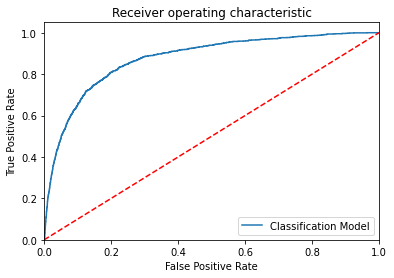

-----------------------------------------------------------------------------------------------------


In [51]:
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')